### Guided Project:
# Predicting Bike Rentals

## Introduction to the Data Set

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.<br>

[Hadi Fanaee-T](http://www.liaad.up.pt/area/fanaee) at the [University of Porto](http://www.up.pt/) compiled this data into a CSV file, which you'll be working with in this project. The file contains `17380` rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). If you need help at any point, you can consult the solution notebook in [our GitHub repository](https://github.com/dataquestio/solutions/blob/master/Mission213Solution.ipynb).

Here's what the first five rows look like:

![https://dq-content.s3.amazonaws.com/tOZ70lr.png](https://dq-content.s3.amazonaws.com/tOZ70lr.png)

Here are the descriptions for the relevant columns:

* `instant` - A unique sequential ID number for each row
* `dteday` - The date of the rentals
* `season` - The season in which the rentals occurred
* `yr` - The year the rentals occurred
* `mnth` - The month the rentals occurred
* `hr` - The hour the rentals occurred
* `holiday` - Whether or not the day was a holiday
* `weekday` - The day of the week (as a number, `0` to `7`)
* `workingday` - Whether or not the day was a working day
* `weathersit` - The weather (as a categorical variable)
* `temp` - The temperature, on a `0-1` scale
* `atemp` - The adjusted temperature
* `hum` - The humidity, on a `0-1` scale
* `windspeed` - The wind speed, on a `0-1` scale
* `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* `registered` - The number of registered riders (people who had already signed up)
* `cnt` - The total number of bike rentals (`casual` + `registered`)

In this project, you'll try to predict the total number of bikes people rented in a given hour. You'll predict the `cnt` column using all of the other columns, except for `casual` and `registered`. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

* Use the pandas library to read `bike_rental_hour.csv` into the dataframe `bike_rentals`.
* Print out the first few rows of `bike_rentals` and take a look at the data.
* Make a histogram of the `cnt` column of `bike_rentals`, and take a look at the distribution of total rentals.
* Use the corr method on the `bike_rentals` dataframe to explore how each column is correlated with `cnt`.

In [1]:
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


* Target Variable(`cnt`) Distribution visualization

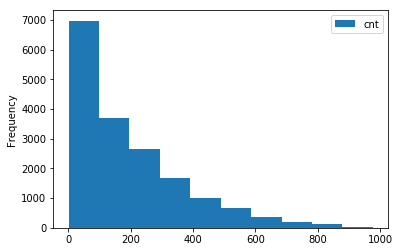

In [3]:
bike_rentals[['cnt']].plot(kind='hist'); plt.show()

* Visualize correlations using `seaborn.heatmap`

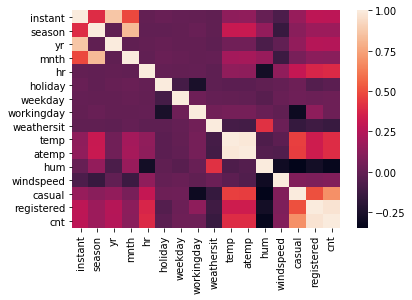

In [4]:
sns.heatmap(bike_rentals.corr());plt.show()

* Most Correlated Features(Top5) with `cnt` - using `abs()`
  1. `registered`
  2. `casual`
  3. `temp`
  4. `atemp`
  5. `hr`

In [5]:
bike_rentals.corr().iloc[-1, :-1].apply(abs).sort_values(ascending=False)

registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

## Calculating Features

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.<br>

For example, the `hr` column in `bike_rentals` contains the hours during which bikes are rented, from `1` to `24`. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for `morning`, `afternoon`, `evening`, and `night`. This will bundle similar times together, enabling the model to make better decisions.

* Write a function called `assign_label` that takes in a numeric value for an hour, and returns:
  * 1 if the hour is from `6` to `12`
  * 2 if the hour is from `12` to `18`
  * 3 if the hour is from `18` to `24`
  * 4 if the hour is from `0` to `6`

* Use the apply method on series objects to apply the function to each item in the `hr` column.
* Assign the result to the `time_label` column of `bike_rentals`.

In [6]:
bike_rentals['hr'].dtype

dtype('int64')

In [7]:
bike_rentals['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
def assign_label(hour):
    
    if 6<=hour<12:
        return 1
    elif 12<=hour<18:
        return 2
    elif 18<=hour<24:
        return 3
    else:
        return 4

In [9]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label'].head()

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

In [10]:
bike_rentals.time_label.unique()

array([4, 1, 2, 3])

## Splitting the Data into Train and Test Sets

Before you can begin applying machine learning algorithms, you'll need to split the data into training and testing sets. This will enable you to train an algorithm using the training set, and evaluate its accuracy on the testing set.<br>

If you train an algorithm on the training data, then evaluate its performance on the same data, you can get an **unrealistically low error value, due to overfitting**.

* Based on your explorations of the `cnt` column, pick an error metric you want to use to evaluate the performance of the machine learning algorithms. Explain why you chose this metric in a markdown cell.
* Select `80%` of the rows in `bike_rentals` to be part of the training set using the [sample method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) on bike_rentals. Assign the result to `train`.
* Select the rows that are in `bike_rentals` but not in `train` to be in the testing set. Assign the result to `test`.
  * This line will generate a Boolean series that's `False` when a row in `bike_rentals` isn't found in `train`:<br> `bike_rentals.index.isin(train.index)`
  * This line will select any rows in `bike_rentals` that aren't found in train to be in the testing set:<br> `bike_rentals.loc[~bike_rentals.index.isin(train.index)]`

* Error metric definition = any `cnt` having values less than 0

In [11]:
bike_rentals.shape

(17379, 18)

In [12]:
train = bike_rentals.sample(frac=.8, replace=False, random_state=0)
train.shape

(13903, 18)

In [13]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.shape

(3476, 18)

## Applying Linear Regression

Now that you've done some exploration and manipulation, you're ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with `cnt`.<br>

As you learned in earlier missions, linear regression works best when **predictors are linearly correlated to the target** and also **independent** -- 

### in other words, they don't change meaning when we combine them with each other.
The good thing about linear regression is that it's **fairly resistant to overfitting because it's straightforward**. It also can be **prone to underfitting the data, however, and not building a powerful enough model**. 

* This means that linear regression usually isn't the most accurate option.

You'll need to ignore the `casual` and `registered` columns because `cnt` is derived from them. If you're trying to predict the number of people who rent bikes in a given hour (`cnt`), it doesn't make sense that you'd already know `casual` or `registered`, because those numbers are added together to get `cnt`.

* Create a list of predictor columns to use in training and predictions.
  * At a minimum, this list should exclude the `cnt`, `casual`, `dteday`, and `registered` columns.
  * Feel free to remove other columns you don't think will be useful for the predictions.
* Use the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from sklearn to train a machine learning algorithm on `train`.
  * Use only the columns in the list of predictors for this.
* Make predictions using the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class on `test`.
  * Use the exact same predictor columns here.
* Calculate the error between the predictions and the actual values.
* Write your thoughts about the predictions and the error in a markdown cell.

In [14]:
columns = list(bike_rentals.columns)
columns.remove('cnt')
columns.remove('casual')
columns.remove('dteday')
columns.remove('registered')

In [15]:
cols_sorted_by_corr = bike_rentals.corr().iloc[-2, :].apply(abs).sort_values(ascending=False)
cols_sorted_by_corr = cols_sorted_by_corr[1:]
cols_sorted_by_corr

registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
time_label    0.378318
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [16]:
cols_sorted_by_corr[cols_sorted_by_corr < .1]

windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [17]:
for lt02 in cols_sorted_by_corr[cols_sorted_by_corr < .1].index:
    columns.remove(lt02)
    
columns

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'time_label']

In [18]:
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [19]:
mean_squared_error(test['cnt'], predictions)

17344.152094771478

In [20]:
r2_score(test['cnt'], predictions)

0.46136905650972893

### Note.
* mean_squared_error is over 10000
* $R^2$ score is less than .5
  * Current model is evidently not working properly.
  * We can consider using decision tree model rather than linear model.

## Applying Decision Trees

Now you're ready to apply the decision tree algorithm. You'll be able to compare its error with the error from linear regression, which will enable you to pick the right algorithm for this data set.<br>

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

* Use the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class to fit a decision tree algorithm to the `train` data.
* Make predictions using the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class on `test`.
Calculate the error between the predictions and the actual values.
Experiment with various parameters of the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class, including `min_samples_leaf`, to see if it changes the error.
* Write your thoughts on the predictions and the error in a markdown cell.

In [21]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(train[columns], train['cnt'])
predictions = dtr.predict(test[columns])

In [22]:
mse = mean_squared_error(test['cnt'], predictions)
r2 = r2_score(test['cnt'], predictions)

print(mse, r2)

10419.1869965 0.676427161634


### Experiment with various parameters
* `criterion` = ['mse', 'mae']
* `splitter` = ['best', 'random']
* `max_depth` = [10, 25, 50]
* `min_samples_split` = [0.1, 0.2, 0.3]
  * The minimum number of samples required to split an internal node:
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
* `min_samples_leaf` = [0.1, 0.2, 0.3]
  * The minimum number of samples required to be at a leaf node:
    * If int, then consider min_samples_leaf as the minimum number.
    * If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* `max_features` = ['auto', 'sqrt', 'log2']
  * The number of features to consider when looking for the best split


In [23]:
from sklearn.model_selection import GridSearchCV

In [106]:
params = {'criterion':('mse', 'mae'),
         'splitter':('best', 'random'),
         'max_depth':(10, 25, 50),
         'min_samples_split':(.1, .2, .3),
         'min_samples_leaf':(.1, .2, .3),
         'max_features':('auto','sqrt','log2')}

dtr = DecisionTreeRegressor(random_state=0)

# by default, GridSearchCV executes KFold n_splits=3 for each loop.
# by default, GridSearchCV follows the default scorer of model input
# in this case, default scorer for DecisionTreeRegressor = R^2.
clf = GridSearchCV(dtr, params)
clf.fit(train[columns], train['cnt'])

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ('mse', 'mae'), 'min_samples_leaf': (0.1, 0.2, 0.3), 'max_features': ('auto', 'sqrt', 'log2'), 'max_depth': (10, 25, 50), 'splitter': ('best', 'random'), 'min_samples_split': (0.1, 0.2, 0.3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [116]:
clf.best_score_

0.50138940019033029

In [112]:
clf.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'splitter': 'best'}

In [113]:
r2_score(train['cnt'], clf.predict(train[columns]))

0.48141423103324144

In [114]:
r2_score(test['cnt'], clf.predict(test[columns]))

0.48173953790020918

* Based on the first result from GridSearchCV, re-arrange the parameters and execute the second GridSearchCV.

In [119]:
params = {'max_depth':(5, 10, 15),
         'min_samples_split':(.05, .075, .1),
         'min_samples_leaf':(.05, .075, .1)}

dtr2 = DecisionTreeRegressor(random_state=0,
                            criterion='mae',
                            splitter='best',
                            max_features='auto')

# by default, GridSearchCV executes KFold n_splits=3 for each loop.
clf2 = GridSearchCV(dtr2, params)
clf2.fit(train[columns], train['cnt'])

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 10, 15), 'min_samples_leaf': (0.05, 0.075, 0.1), 'min_samples_split': (0.05, 0.075, 0.1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [120]:
clf2.best_score_

0.59875353657216257

In [122]:
clf2.best_params_

{'max_depth': 10, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05}

In [26]:
params = {'min_samples_split':(0.01, 0.025, .05),
         'min_samples_leaf':(0.01, 0.025, .05)}

dtr3 = DecisionTreeRegressor(random_state=0,
                            criterion='mae',
                            splitter='best',
                            max_features='auto',
                            max_depth=10)

# by default, GridSearchCV executes KFold n_splits=3 for each loop.
clf3 = GridSearchCV(dtr3, params)
clf3.fit(train[columns], train['cnt'])

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': (0.01, 0.025, 0.05), 'min_samples_split': (0.01, 0.025, 0.05)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
clf3.best_score_

0.69281695004013555

In [28]:
clf3.best_params_

{'min_samples_leaf': 0.01, 'min_samples_split': 0.01}

### Note.
* `min_samples_split` and `min_samples_leaf` seem to have major effects on the performance of the single `DecisionTreeRegressor`.

## Applying Random Forests

You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

* Use the [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) class to fit a random forest algorithm to the `train` data.
* Make predictions using the [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) class on test.
* Calculate the error between the predictions and the actual values.
* Experiment with various parameters of the [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) class, including `min_samples_leaf`, to see if it changes the error.
* Write your thoughts on the predictions and the error in a markdown cell.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

Applying the best parameters found above to `RandomForestClassifier` equally.
* Variate only `n_estimators`.

In [31]:
for num in [10, 50, 100]:

    rfr = RandomForestRegressor(n_estimators=num,
                               random_state = 0,
                               criterion = 'mae',
                               max_depth = 10,
                               min_samples_split = 0.01,
                               min_samples_leaf = 0.01,
                               max_features = 'auto')
    
    rfr.fit(train[columns], train['cnt'])
    
    # execute KFold Cross-validation
    # scorer : R^2
    # n_splits of KFold = 3 (default)
    kf = KFold(random_state=1)
    scores = cross_val_score(rfr, train[columns], train['cnt'], cv=kf,\
                           scoring='r2')
    print(num, np.mean(scores))

10 0.694592304176
50 0.693793181661
100 0.6949267436


## Conclusion

* Using RandooForestRegressor doesn't seem to make imporovements to the previous result with one DecisionTreeRegressor.
* We can try a few steps for better performance:
  * Feature engineering
    * feature selectiion
    * creating new features using the original features
  * Tweaking class_weights paramter